In [10]:
# %pip install -r ../../requirements.txt

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

from pic import PIC
from evaluation import evaluate_clustering_algorithms
from datasets import synthetic_dataset_1, synthetic_dataset_2, synthetic_dataset_3

Total time taken for fit_predict: 24.692196130752563 seconds


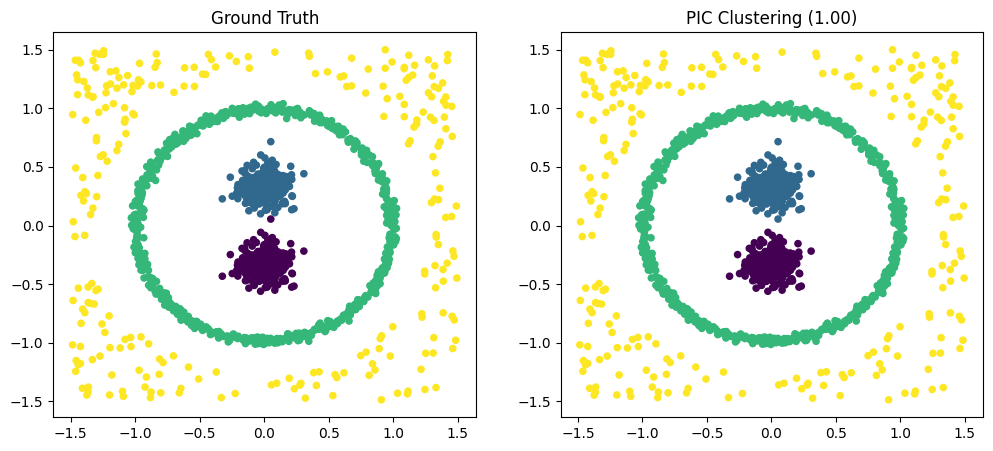

Total time taken for fit_predict: 44.944011926651 seconds


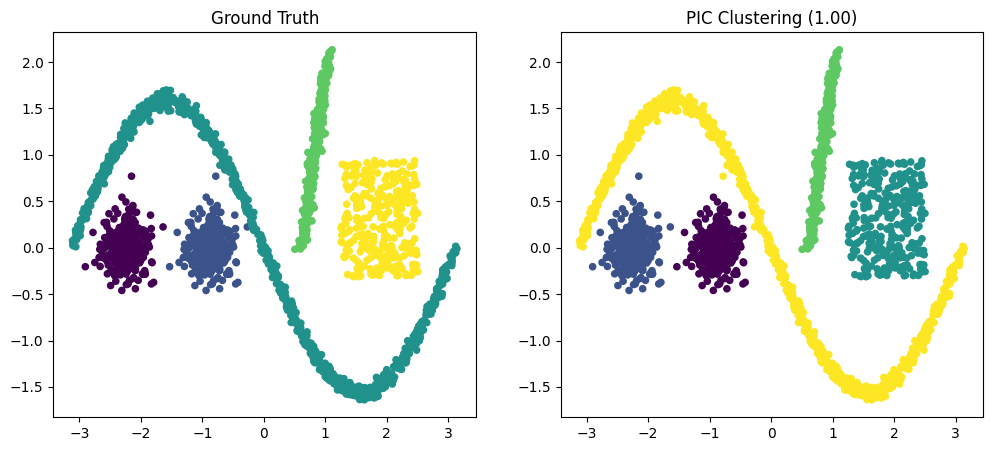

Total time taken for fit_predict: 28.39759922027588 seconds


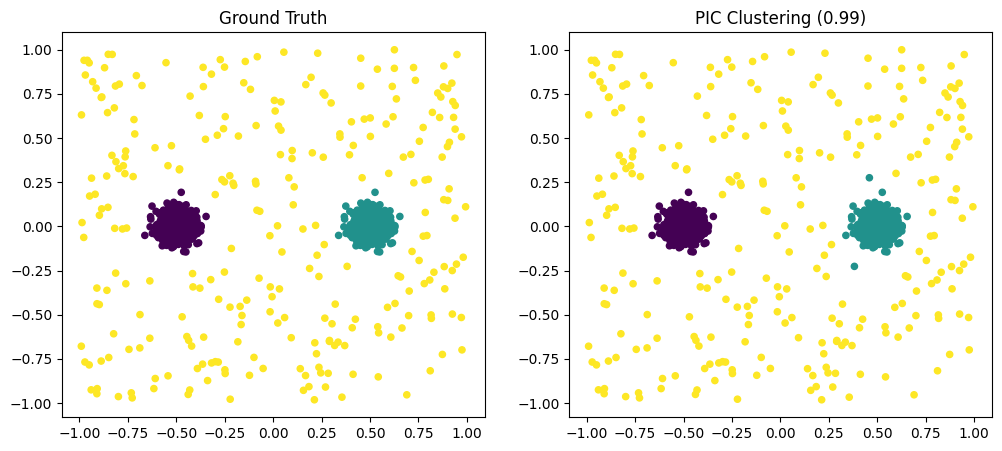

In [2]:
from sklearn.metrics import normalized_mutual_info_score

for dataset in [synthetic_dataset_1, synthetic_dataset_2, synthetic_dataset_3]:
    random_state = 42 # np.random.randint(0, 100)
    # print("Random State: ", random_state)
    X, Y_true = dataset(cluster_density=0.75, random_state=random_state)
    pic = PIC(n_clusters=int(np.max(Y_true)+1), k=20, a=0.95, z=0.01)
    Y_pred_PIC = pic.fit_predict(X)
    nmi_score = normalized_mutual_info_score(Y_true, Y_pred_PIC)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(X[:, 0], X[:, 1], c=Y_true, cmap='viridis', s=20)
    plt.title("Ground Truth")

    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X[:, 1], c=Y_pred_PIC, cmap='viridis', s=20)
    plt.title(f"PIC Clustering ({nmi_score:.2f})")

    plt.show()

Total time taken for fit_predict: 5.308936595916748 seconds


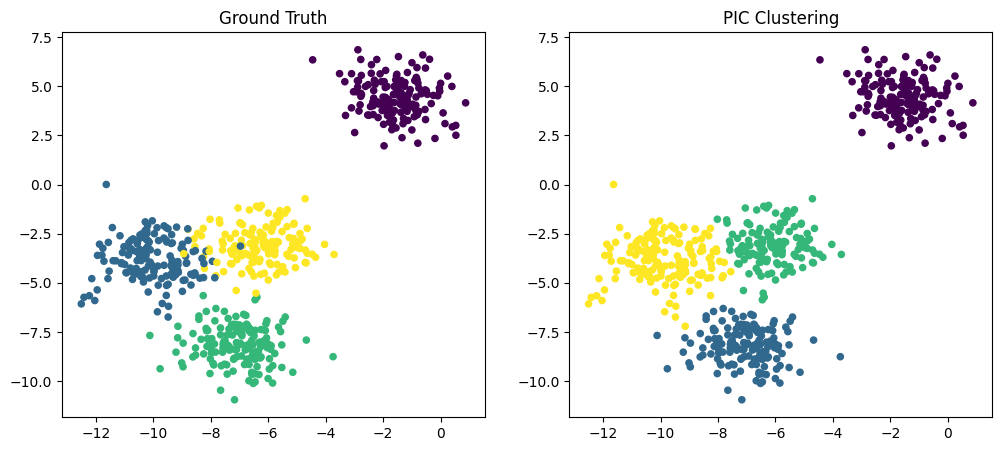

In [4]:
# Generate synthetic data.
n_samples = 600
n_clusters = 4
X, Y_true = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=1)
pic = PIC(n_clusters=n_clusters, k=20, a=0.95, z=0.01)
Y_pred_PIC = pic.fit_predict(X)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y_true, cmap='viridis', s=20)
plt.title("Ground Truth")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=Y_pred_PIC, cmap='viridis', s=20)
plt.title("PIC Clustering")

plt.show()

In [5]:
results_df = evaluate_clustering_algorithms(X, Y_true, n_clusters, Y_pred_PIC)
print(results_df)

k-med: NMI = 0.7763, CE = 0.3067
A-link: NMI = 0.8074, CE = 0.2517
S-link: NMI = 0.5739, CE = 0.4967
C-link: NMI = 0.9080, CE = 0.0350
AP: NMI = 0.6485, CE = 0.6117
NCuts: NMI = 0.9275, CE = 0.0250


c:\Users\sanch\Desktop\MAI\Semester2\URL\mai-url\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


NJW: NMI = 0.7708, CE = 0.1650
CT: NMI = 0.5553, CE = 0.4550
Zell: NMI = 0.9090, CE = 0.0317
C-kernel: NMI = 0.9211, CE = 0.0250
D-kernel: NMI = 0.8928, CE = 0.0400
   Algorithm       NMI        CE
0        PIC  0.910552  0.031667
1      k-med  0.776278  0.306667
2     A-link  0.807424  0.251667
3     S-link  0.573944  0.496667
4     C-link  0.907993  0.035000
5         AP  0.648494  0.611667
6      NCuts  0.927548  0.025000
7        NJW  0.770842  0.165000
8         CT  0.555285  0.455000
9       Zell  0.908994  0.031667
10  C-kernel  0.921130  0.025000
11  D-kernel  0.892783  0.040000


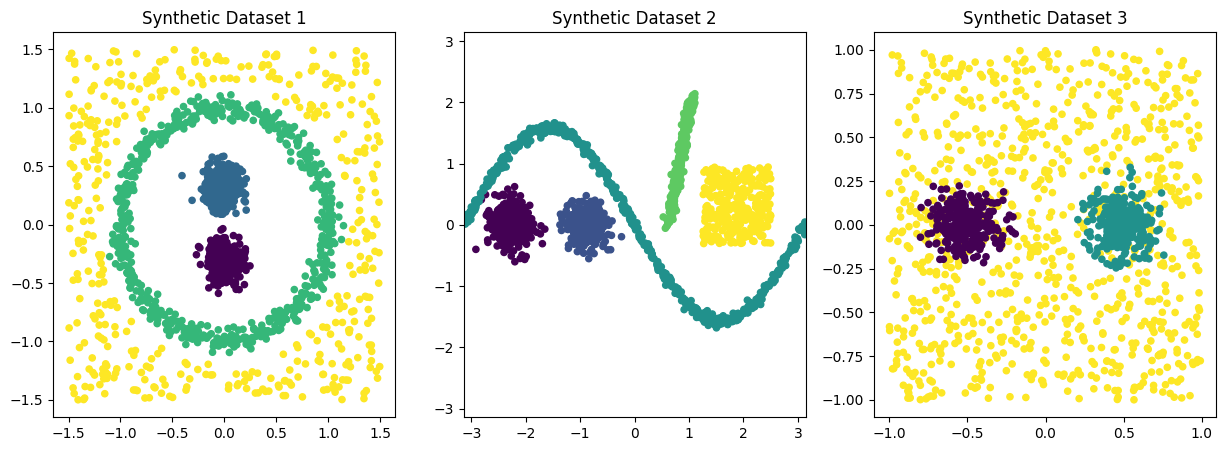

In [ ]:
X, Y = synthetic_dataset_1()

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", s=20)
plt.title("Synthetic Dataset 1")

X, Y = synthetic_dataset_2()

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", s=20)
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)
plt.title("Synthetic Dataset 2")

X, Y = synthetic_dataset_3()

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap="viridis", s=20)
plt.title("Synthetic Dataset 3")

plt.show()